<div align="center">
<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/CV/1_Introduccion/ejercicios/ejercicios_solucion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
 Recordá abrir en una nueva pestaña </div>
 
 
# Face detection con multiples caras y facial landmark detection

En la clase teórica vimos la técnica de detección de caras y la aplicamos a una imagen bastante centrada de una persona. 

En esta práctica vamos a usar detectar más de una cara, recorriendo todos los pasos previos, y vamos a aplicar una técnica más avanzada: la de localización de landmarks faciales. La detección de landmarks identifica un conjunto de puntos en un rostro (ojo izquierdo, ojo derecho, boca, pera, etc). Hay diferentes mallas de landmarks, algunas con más puntos que otras. Dos mallas típicas son la de 68 landmarks y la de 468.

Hoy usaremos la de 68 que puede usarse directamente desde `OpenCV`. ¡Vamos!

<div>
    <img width="400px" height="800px" src="https://929687.smushcdn.com/2633864/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg" />
    </div>

# Instalación e importación de librerías

In [1]:
%%capture
!pip install matplotlib opencv-python opencv-contrib-python

In [2]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Bajemos también las imagenes y los recursos que vamos a necesitar:

In [4]:
%%capture
!mkdir ../imgs/
!wget https://raw.githubusercontent.com/institutohumai/cursos-python/master/CV/1_Introduccion/imgs/9reinas.jpg -O ../imgs/9reinas.jpg
!wget https://raw.githubusercontent.com/institutohumai/cursos-python/master/CV/1_Introduccion/haarcascade_frontalface_default.xml -O ../haarcascade_frontalface_default.xml

In [5]:
# Esta linea debería tardar un ratito ya que baja un archivo de ~70Mb que hace falta para el detector de landmarks

In [6]:
%%capture
!wget https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml -O lbfmodel.yaml

# Empezamos

(360, 480, 3)


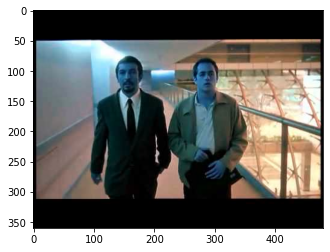

In [7]:
# Vamos a trabajar con una imagen de Darín y Pauls
img = cv2.imread("../imgs/9reinas.jpg")
print(img.shape)
plt.imshow(img);

# Detección de caras

#### Ejercicio 1. Transformar la imagen de BGR a RGB

In [8]:
img_rgb = ... # Completar!!

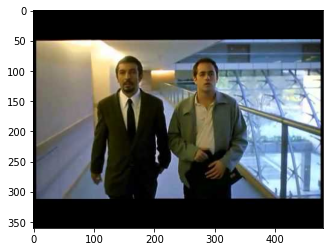

In [9]:
plt.imshow(img_rgb);

#### Ejercicio 2. Transformar la imagen de escalas de grises

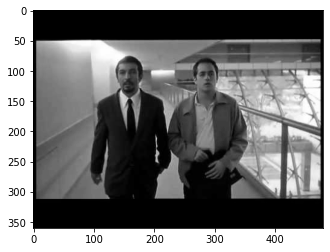

In [10]:
# El algoritmo de cascadas de Haar funciona sobre imagenes en escala de grises
img_gray = ... # Completar
plt.imshow(img_gray, cmap='gray');

#### Ejercicio 3. Definir el `CascadeClassifier` usando el archivo `../haarcascade_frontalface_default.xml` y usarlo para detectar los rostros

In [11]:

face_cascade = ... # Completar

# Finalmente, aplicamos el detector a la imagen
faces = ... # Completar

len(faces)

2

#### Ejercicio 4. Agregar las dos bounding boxes a `img_rgb`, la de Darín en rojo y la de Pauls en verde.
Escribir el texto "Darin" y "Pauls" inmediatamente sobre los rectangulos, con los colores adecuados.

_Tip: si algo sale mal e `img_rgb` queda fea, basta volver a correr la celda que la define para tener una versión limpia otra vez_

In [ ]:
... # Completar

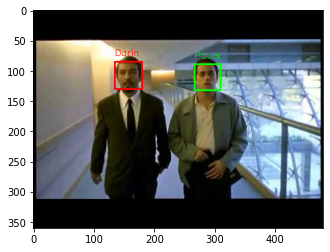

In [13]:
# Así debería quedar img_rgb:
plt.imshow(img_rgb);

# Detección de landmarks

In [14]:
# Esta parte la dejamos hecha porque es nueva

# Creamos el detector de landmarks
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel("lbfmodel.yaml")

# Lo aplicamos
# Notar que recibe de parametro la imagen en escala de grises 
# y las bounding boxes del algoritmo de deteccion de caras
_, all_landmarks = landmark_detector.fit(img_gray, faces)

# Nos genera dos resultados
# Que bueno, porque hay dos caras
len(all_landmarks)

2

In [15]:
# Agarramos el primer set de landmarks
landmarks_pauls = all_landmarks[0]
landmarks_pauls.shape

(1, 68, 2)

In [16]:
# Viene una dimension de más al principio, por eso pedimos [0]
landmarks_pauls = landmarks_pauls[0]

landmarks_pauls.shape

(68, 2)

In [17]:
# Ademas, vienen como float y queremos que sean int: lo convertimos a int
landmarks_pauls = landmarks_pauls.astype(int)

# Tenemos 68 puntos
landmarks_pauls.shape

(68, 2)

In [18]:
# Cada punto define las coordenadas x, y de un landmark facial específico. 
# Podemos ver cual es en la imagen a continuación
# Estos 3 primeros corresponden con la zona de la sien derecha del sujeto
landmarks_pauls[:3]

array([[269, 110],
       [270, 114],
       [271, 118]])


<div>
    <img width="400px" height="800px" src="https://929687.smushcdn.com/2633864/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg" />
    </div>

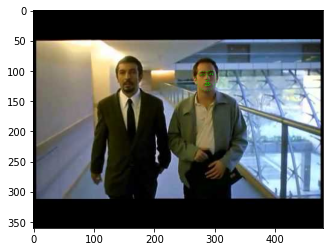

In [19]:
# Hacemos otra copia para borrar las bounding boxes que escribimos antes
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ploteemoslos:
for x, y in landmarks_pauls:
    cv2.circle(img_rgb, (x, y), 0, (0, 255, 0), 1)
plt.imshow(img_rgb);

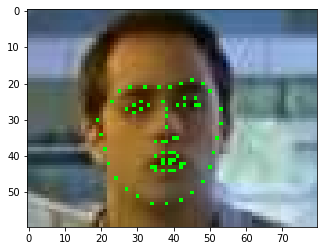

In [20]:
# La cara es muy chica en la imagen y no se ven, pero ahí están!
plt.imshow(img_rgb[80:140, 250:330]);

#### Ejercicio 5. Hacer todo lo mismo pero con Ricardo Darín, en rojo

In [ ]:
... #Completar

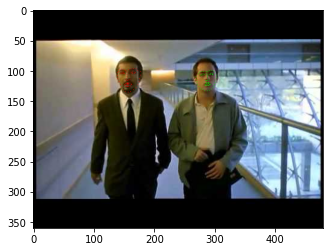

In [23]:
# Así debería quedar la imagen
plt.imshow(img_rgb);

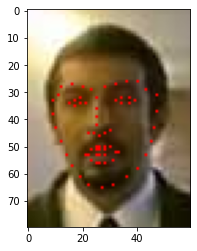

In [24]:
plt.imshow(img_rgb[70:150, 130:190]);

#### Ejercicio 6. Encontrar los ojos y la boca de Pauls. Agregarlos a una copia de `img_rgb` con tres colores distintos sin agregar los demás landmarks.

Traigo la imagen de la malla facial para que sea más fácil.

Acordate que la malla empieza de 1 y el array empieza de 0


<div>
    <img width="400px" height="800px" src="https://929687.smushcdn.com/2633864/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg" />
    </div>

In [32]:
# Hacemos otra copia para borrar todo
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Les damos los indices de la boca 
indices_boca = list(range(48, 66))
indices_boca

[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]

In [ ]:
# Acordate de restar 1 a lo que dice la malla para dar cuenta del indexado desde 0 
indices_ojo_derecho = ... # Completar 
indices_ojo_izquierdo = ... # Completar

In [26]:

# Llenar estas tres listas con los puntos (x, y) relevantes
# Usando las listas de indices creadas anteriormente
landmarks_ojo_derecho = []
landmarks_ojo_izquierdo = []
landmarks_boca = []

for i, (x, y) in enumerate(landmarks_pauls):
    ... # Completar

In [27]:
# Así debería verse landmarks_ojo_derecho:
landmarks_ojo_derecho

[(277, 107), (279, 106), (281, 105), (283, 106), (281, 107), (279, 108)]

In [ ]:
# Ploteemoslos:
... # Completar

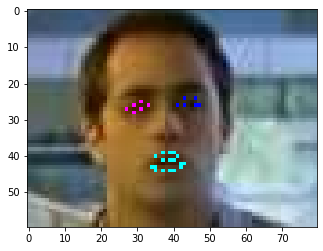

In [30]:
# Así debería verse la cara de Gastón Pauls al terminar (con otros colores)
plt.imshow(img_rgb[80:140, 250:330]);

Estos 3 elementos son los ladrillos con los cuales se puede construir un detector de sueño para conductores de automóviles.


Con los puntos de los ojos podemos crear fácilmente un detector de parpadeos (usando la métrica EAR, Eye Aspect Ratio) y también un detector de bostezos usando el Mouth Aspect Ratio (MAR).

Si te gustó lo que venímos haciendo hastá acá, un ejercicio sencillo para continuar puede ser el siguiente:

1. Googleá sobre EAR y calculá esa métrica para cada ojo, escribila en la imagen con `putText`
2. Aplicá todo lo anterior sobre un video, generando una serie de tiempo de EAR para ojo izquierdo y ojo derecho
3. Cuando ambos EAR bajen por debajo de un límite mínimo, detectá un parpadeo y escribí en la imagen